In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("C://Users//RASHMI KUMARI//Downloads//Training Dataset.csv")

In [3]:
# 1 st 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#save a copy 
train_org=train.copy()

In [5]:
# total information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#i want to know the number of rows and columns
train.shape

(614, 13)

In [9]:
#hey data does you have duplicates?
train.duplicated().sum()

0

In [10]:
#for numeriacal imputagtion using mean or median
#for categorical imputation using mode

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [11]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [13]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#loan status count
loan_sta_count=train['Loan_Status'].value_counts(normalize=True)  

In [15]:
loan_sta_count

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

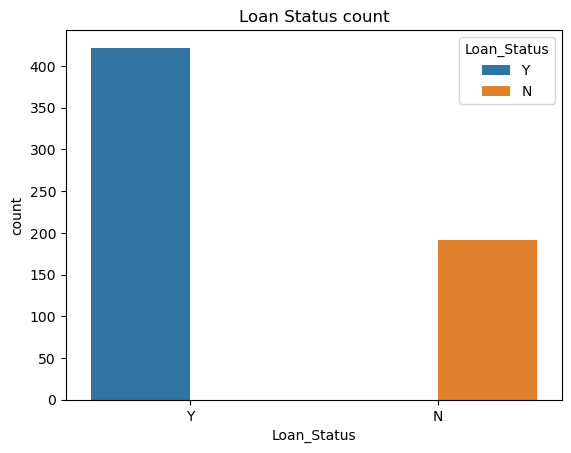

In [22]:
plt.title('Loan Status count')
sns.countplot(x='Loan_Status',hue='Loan_Status',data=train)
plt.show()

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed', ylabel='count'>

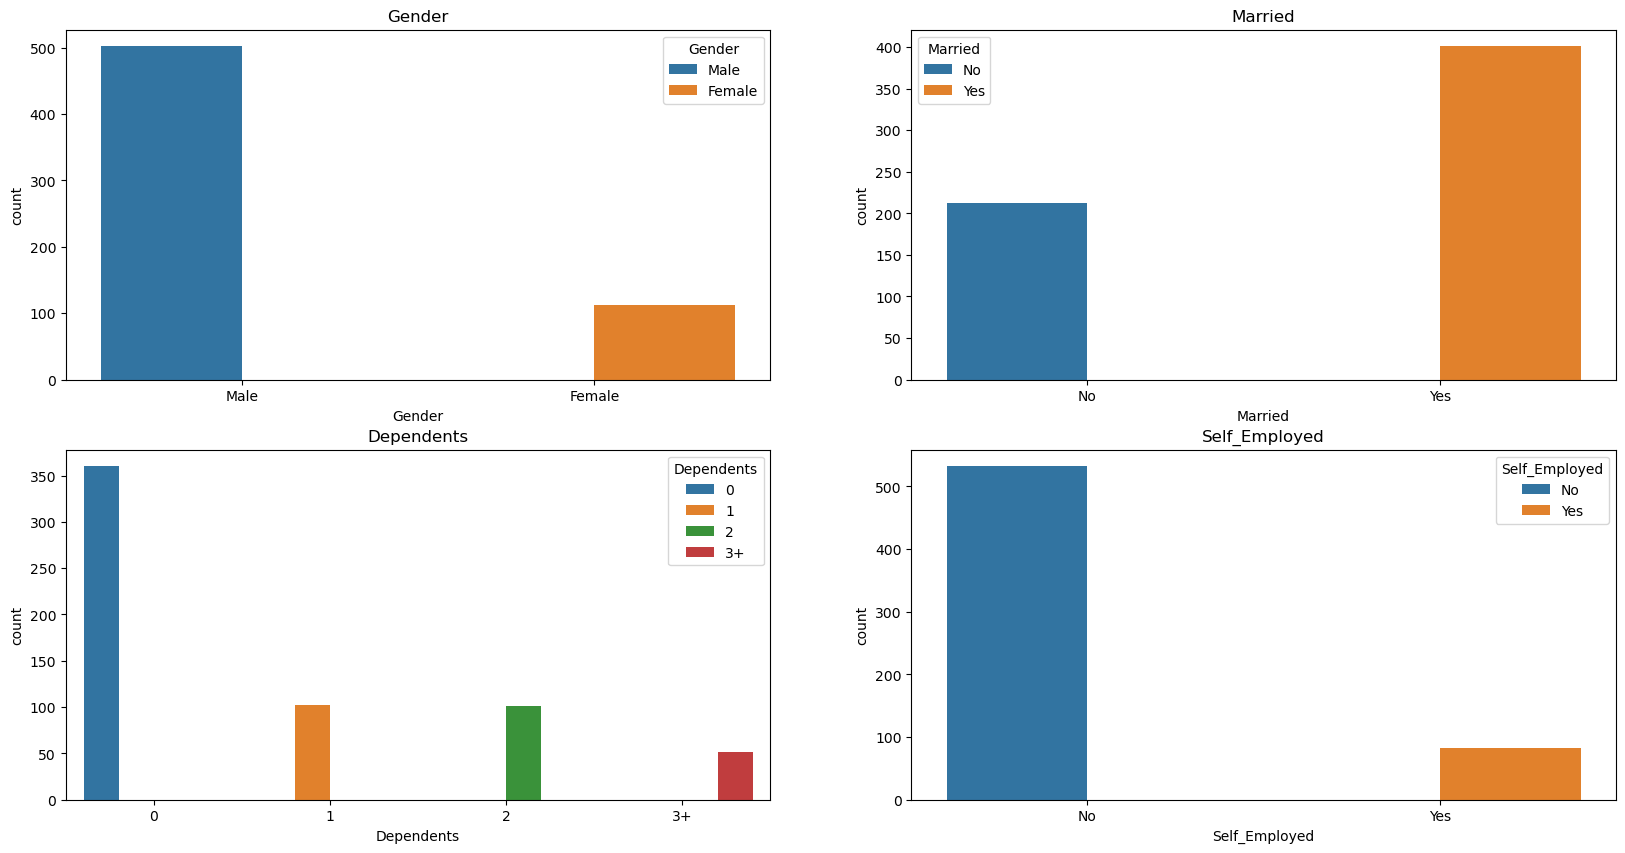

In [24]:
# catogorical variable count
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(221)
plt.title('Gender')
sns.countplot(x='Gender',data=train,hue='Gender')
plt.subplot(222)
plt.title('Married')
sns.countplot(x='Married',data=train,hue='Married')
plt.subplot(223)
plt.title('Dependents')
sns.countplot(x='Dependents',data=train,hue='Dependents')
plt.subplot(224)
plt.title('Self_Employed')
sns.countplot(x='Self_Employed',data=train,hue='Self_Employed')

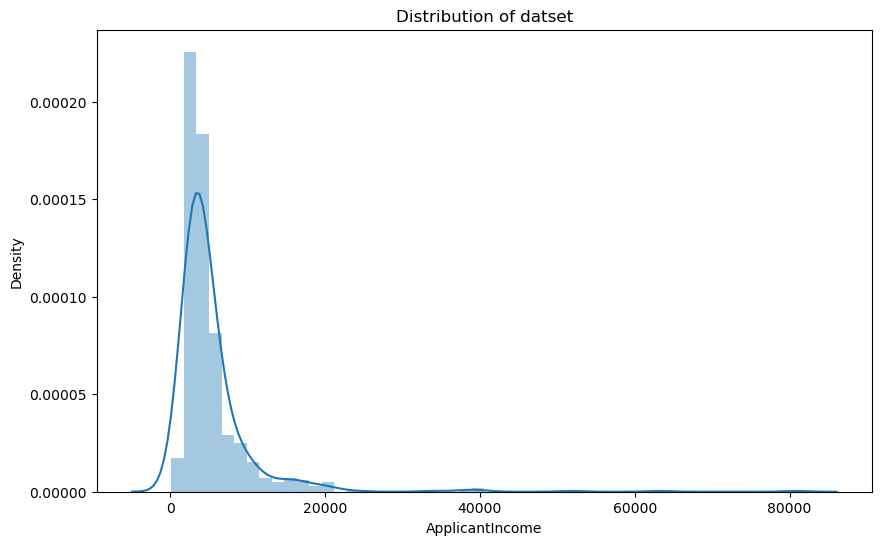

In [25]:
#distribustion of appliants income
plt.figure(figsize=(10,6))
plt.title('Distribution of datset')
sns.distplot(train['ApplicantIncome'])
plt.show()

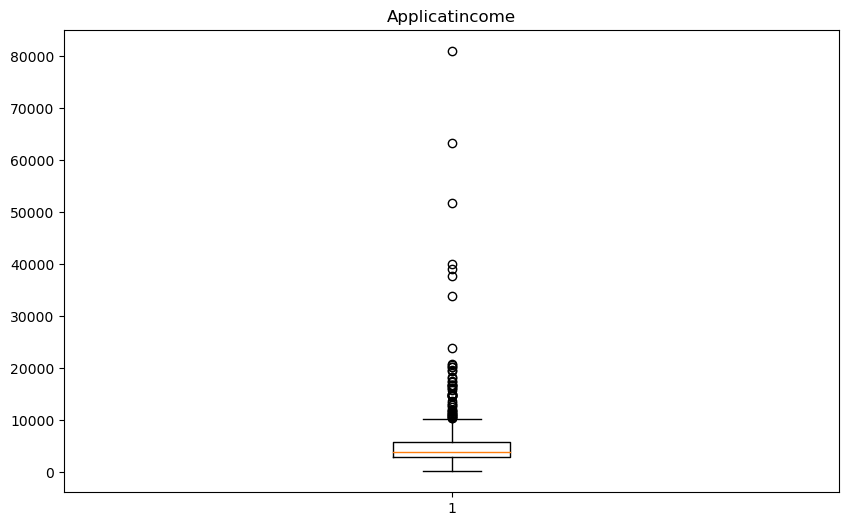

In [26]:
#checking the outliers
plt.figure(figsize=(10,6))
plt.title('Applicatincome')
plt.boxplot(train['ApplicantIncome'],vert=True)
plt.show();

Text(0.5, 0.98, '')

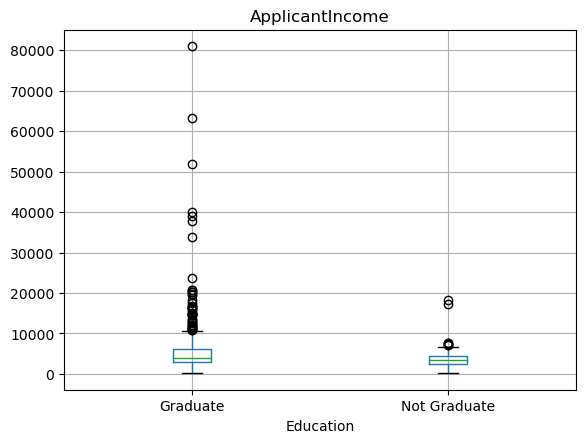

In [27]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("") 

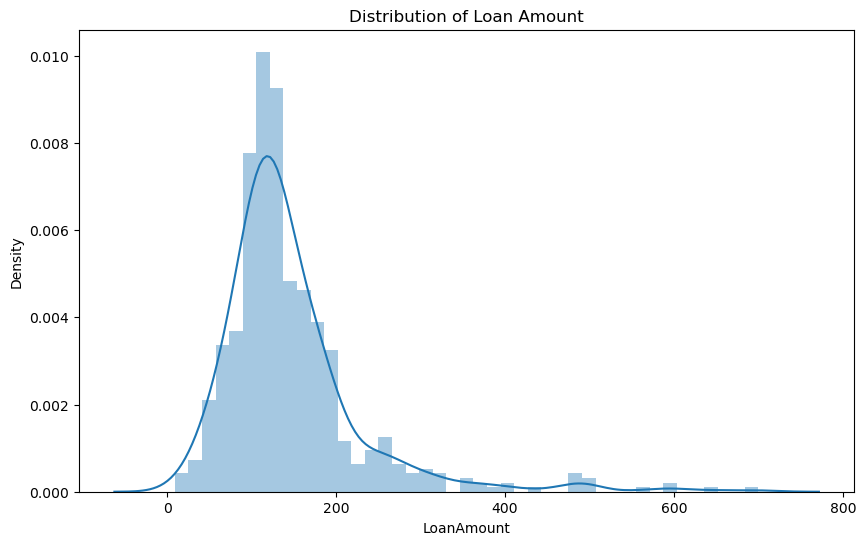

In [28]:
#distribution of loan amount
plt.figure(figsize=(10,6))
plt.title('Distribution of Loan Amount')
sns.distplot(train['LoanAmount'])
plt.show()

<Axes: >

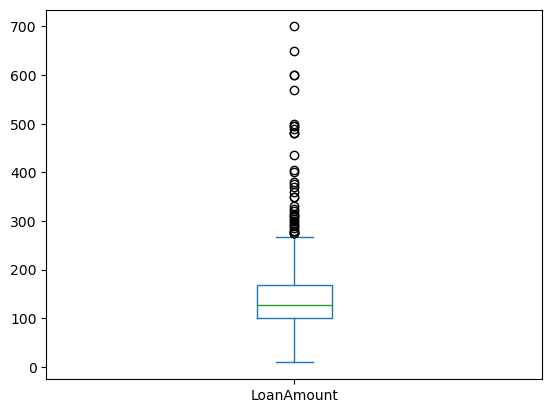

In [29]:
train['LoanAmount'].plot.box()

# Bivariant Analysis

In [30]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Gender'>

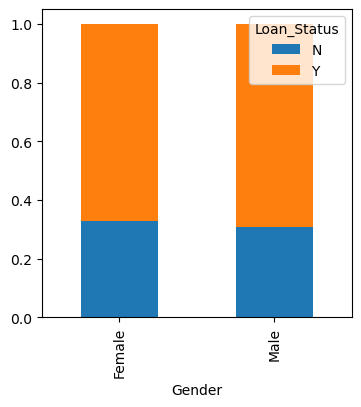

In [31]:
#gender vs loan status
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',
                                                   stacked=True,figsize=(4,4))

In [32]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


Loan_Status    N    Y
Married              
No            79  134
Yes          113  288
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


<Axes: xlabel='Self_Employed'>

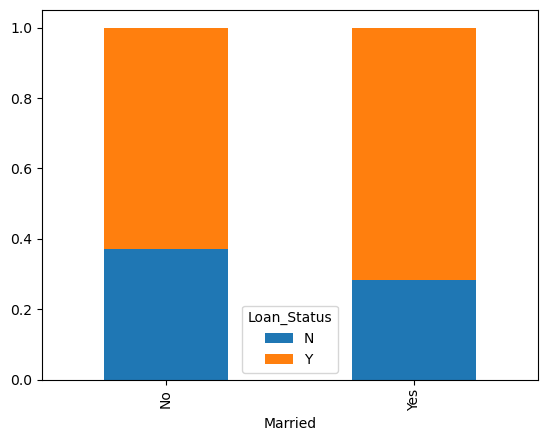

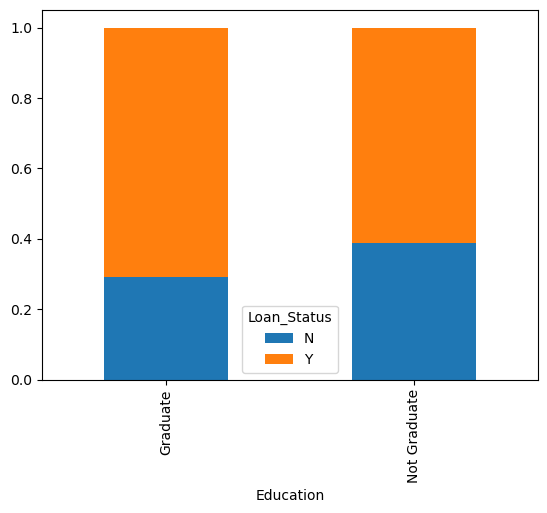

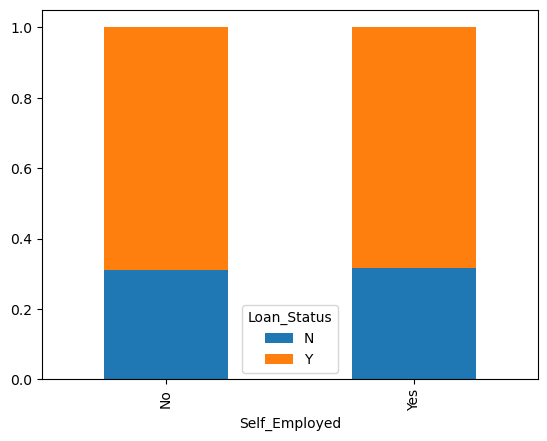

In [33]:
#married vs loan status
Married=pd.crosstab(train['Married'],train['Loan_Status'])
print(Married)
#education vs loan status
Education=pd.crosstab(train['Education'],train['Loan_Status'])
print(Education)
#eployment vs loan status
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
print(Self_Employed)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',
                                                    stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',
                                                         stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar'
                                                                 ,stacked=True)

<Axes: xlabel='Property_Area'>

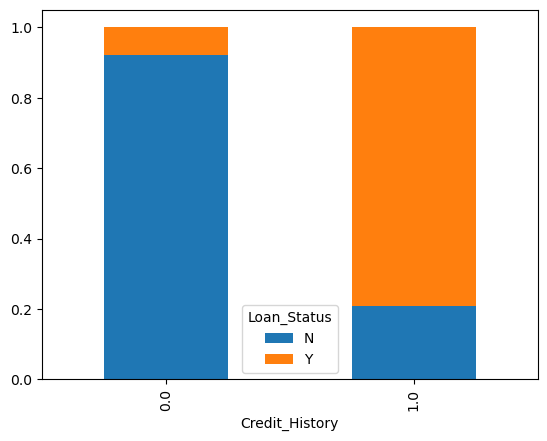

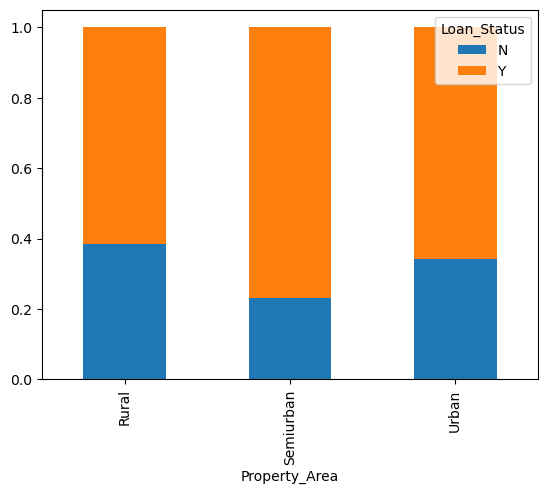

In [34]:
#credit history vs loan status
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
#property vs loan status
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar'
                                                                   ,stacked=True)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

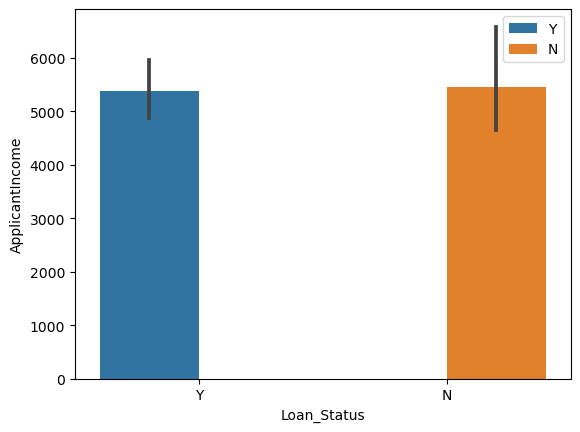

In [35]:
#applicant income vs loan status
sns.barplot(data=train,x='Loan_Status',y='ApplicantIncome',hue='Loan_Status')
plt.legend()

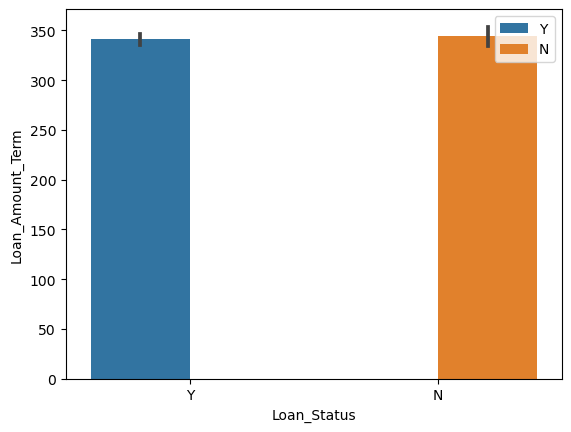

In [36]:
##loan amount term vs loan status
sns.barplot(data=train,x='Loan_Status',y='Loan_Amount_Term',hue='Loan_Status')
plt.legend()

In [37]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

<Axes: >

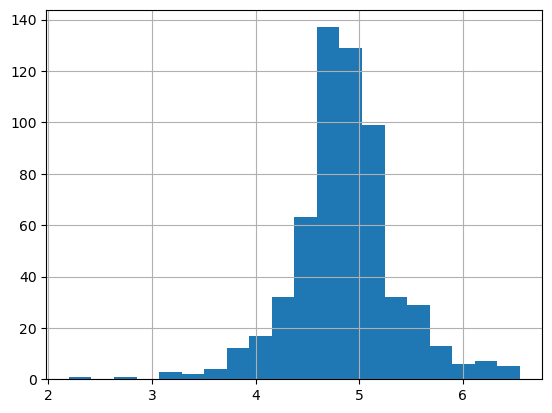

In [46]:
# outliers treatment
train['Loan_Amount_log']=np.log(train['LoanAmount'])
train['Loan_Amount_log'].hist(bins=20)


In [60]:
# Model Building
X=train.drop(['Loan_Status'],axis=1)
y=train.Loan_Status

<Axes: >

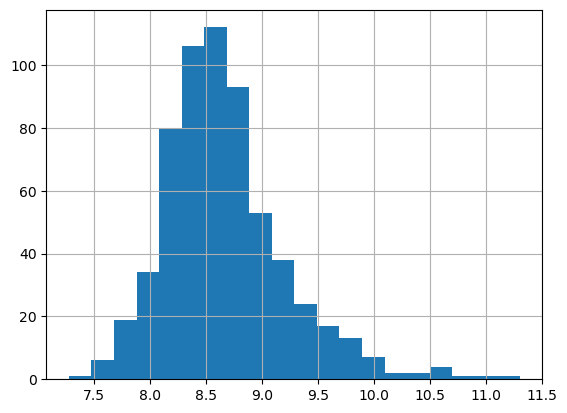

In [57]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['total_income_log']=np.log(train['Total_income'])
train['total_income_log'].hist(bins=20)

In [61]:
train.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [62]:
# Encoding
train= pd.get_dummies(train,drop_first=True)
train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Total_income,total_income_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,NaN,360.0,1.0,1,NaN,5849.0,8.674026,True,False,True,False,False,False,False,False,True
1,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,True,True,False,True,False,False,False,False,False
2,66.0,360.0,1.0,1,4.189655,3000.0,8.006368,True,True,True,False,False,False,True,False,True
3,120.0,360.0,1.0,1,4.787492,4941.0,8.505323,True,True,True,False,False,True,False,False,True
4,141.0,360.0,1.0,1,4.948760,6000.0,8.699515,True,False,True,False,False,False,False,False,True


In [65]:
X=train.drop(['Loan_Status'],axis=1)
y=train.Loan_Status

In [73]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train=scale.fit_transform(X,y)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)